## Partie 2 : Étude de la précision de la solution

L'équation logistique est l'un des rares cas d'équations différentielles non linéaires qui possède une solution analytique exacte.

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Paramètres du modèle
r = 0.05    # Taux de croissance intrinsèque
K = 100000  # Capacité limite (taille du marché)
P0 = 1000   # Nombre initial de clients

P atteint 50000 clients après exactement 91.90 mois


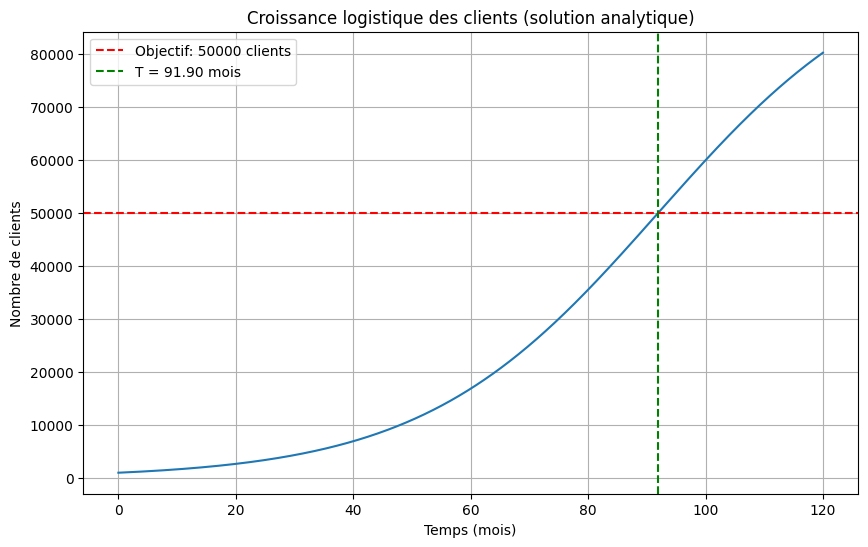

Clients initiaux: 1000.0
Clients après 12 mois: 1807
Clients après 24 mois: 3245
Clients après 60 mois: 16866
Clients après 92 mois: 50122


In [4]:
# Fonction analytique exacte
def P(t):
    return K / (1 + ((K-P0)/P0) * math.exp(-r*t))

# Calcul du temps nécessaire pour atteindre 50000 clients
def time_to_reach(target):
    # Formule inversée: t = -ln(P0*(K-target)/(target*(K-P0)))/r
    return -math.log(P0*(K-target)/(target*(K-P0)))/r

# Temps pour atteindre 50000 clients
t_target = time_to_reach(50000)
print(f"P atteint 50000 clients après exactement {t_target:.2f} mois")

# Générer des points pour le graphique
t_values = np.linspace(0, 120, 1000)
P_values = [P(t) for t in t_values]

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(t_values, P_values)
plt.axhline(y=50000, color='r', linestyle='--', label='Objectif: 50000 clients')
plt.axvline(x=t_target, color='g', linestyle='--', label=f'T = {t_target:.2f} mois')
plt.xlabel('Temps (mois)')
plt.ylabel('Nombre de clients')
plt.title('Croissance logistique des clients (solution analytique)')
plt.grid(True)
plt.legend()
plt.show()

# Afficher quelques valeurs clés
print(f"Clients initiaux: {P(0)}")
print(f"Clients après 12 mois: {P(12):.0f}")
print(f"Clients après 24 mois: {P(24):.0f}")
print(f"Clients après 60 mois: {P(60):.0f}")
print(f"Clients après 92 mois: {P(92):.0f}")

### Explications : 

Ce résultat de 91,90 mois est désormais la valeur exacte, obtenue grâce à la solution analytique de l'équation différentielle logistique.

Cette valeur confirme que l'approximation avec la méthode d'Euler et un petit pas (91,92 mois) était très proche de la solution exacte, avec seulement 0,02 mois d'écart. En revanche, la première approximation avec un pas plus grand (92,10 mois) était moins précise.

L'avantage de la solution analytique est qu'elle donne instantanément la valeur exacte sans itérations successives, offrant à la fois précision et efficacité de calcul. Pour des applications réelles de modélisation de croissance, cette approche est préférable quand une solution analytique existe.



### Comparaison  des résultats d’approximations avec le résultat de cette fonction pour plusieurs valeurs sur base de la MSE.

Pas de temps: 5, MSE: 32577043.15
Pas de temps: 1, MSE: 1409580.02
Pas de temps: 0.5, MSE: 355844.97
Pas de temps: 0.1, MSE: 14345.08
Pas de temps: 0.01, MSE: 143.70

Comparaison des valeurs à des moments spécifiques:
Temps (mois) | Valeur exacte | Euler (dt=1) | Euler (dt=0.1) | Euler (dt=0.01)
---------------------------------------------------------------------------
       0.00 |      1000.00 |     1000.00 |       1000.00 |        1000.00
      12.00 |      1807.26 |     1782.34 |       1804.68 |        1807.00
      24.00 |      3244.83 |     3158.11 |       3235.81 |        3243.93
      60.00 |     16866.48 |    15977.77 |      16773.98 |       16857.19
      91.90 |     49997.00 |    48114.36 |      49795.28 |       49976.82

Pente approximative de la courbe d'erreur (log-log): 1.99
Cela suggère que la méthode d'Euler a un ordre de convergence de ~2

Comparaison à t=91.9 mois (moment d'atteinte des 50000 clients):
Valeur exacte: 49997.00
Euler (dt=1): 48114.36, erreur absolue: 

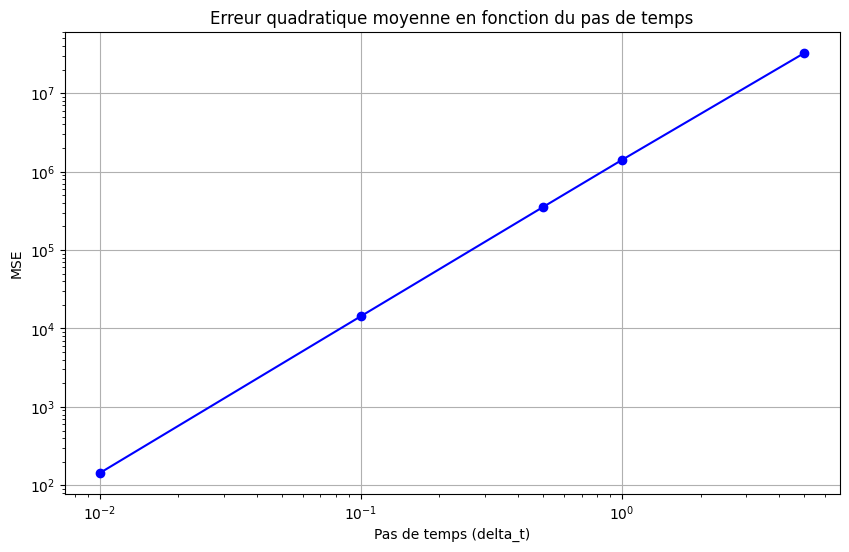

In [7]:
# Méthode d'Euler avec différents pas de temps
def euler_method(delta_t, t_max):
    n_steps = int(t_max / delta_t)
    t = np.zeros(n_steps + 1)
    P = np.zeros(n_steps + 1)
    P[0] = P0  # Condition initiale
    
    for n in range(n_steps):
        P[n+1] = P[n] + delta_t * r * P[n] * (1 - P[n]/K)
        t[n+1] = t[n] + delta_t
    
    return t, P

# Calculer MSE entre l'approximation d'Euler et la solution exacte
def calculate_mse(P_euler, t_euler):
    # Calculer les valeurs exactes aux mêmes points temporels
    P_values = np.array([P(t) for t in t_euler])
    
    # Calculer MSE
    mse = np.mean((P_euler - P_values) ** 2)
    return mse

# Tester différents pas de temps
t_max = 120  # Mois
delta_t_values = [5, 1, 0.5, 0.1, 0.01]
mse_results = []

for delta_t in delta_t_values:
    t_euler, P_euler = euler_method(delta_t, t_max)
    mse = calculate_mse(P_euler, t_euler)
    mse_results.append(mse)
    print(f"Pas de temps: {delta_t}, MSE: {mse:.2f}")

# Afficher quelques valeurs spécifiques pour comparer
comparison_times = [0, 12, 24, 60, 91.9]
exact_values = [P(t) for t in comparison_times]

print("\nComparaison des valeurs à des moments spécifiques:")
print("Temps (mois) | Valeur exacte | Euler (dt=1) | Euler (dt=0.1) | Euler (dt=0.01)")
print("-" * 75)

# Calculer les valeurs d'Euler pour différents pas
t_euler_1, P_euler_1 = euler_method(1, t_max)
t_euler_01, P_euler_01 = euler_method(0.1, t_max)
t_euler_001, P_euler_001 = euler_method(0.01, t_max)

for i, t in enumerate(comparison_times):
    # Trouver l'indice le plus proche pour chaque pas de temps
    idx_1 = min(range(len(t_euler_1)), key=lambda i: abs(t_euler_1[i]-t))
    idx_01 = min(range(len(t_euler_01)), key=lambda i: abs(t_euler_01[i]-t))
    idx_001 = min(range(len(t_euler_001)), key=lambda i: abs(t_euler_001[i]-t))
    
    print(f"{t:11.2f} | {exact_values[i]:12.2f} | {P_euler_1[idx_1]:11.2f} | {P_euler_01[idx_01]:13.2f} | {P_euler_001[idx_001]:14.2f}")

# Tracer les erreurs
plt.figure(figsize=(10, 6))
plt.loglog(delta_t_values, mse_results, 'bo-')
plt.xlabel('Pas de temps (delta_t)')
plt.ylabel('MSE')
plt.title('Erreur quadratique moyenne en fonction du pas de temps')
plt.grid(True)

# Afficher la pente pour vérifier l'ordre de convergence
log_delta_t = np.log10(np.array(delta_t_values))
log_mse = np.log10(np.array(mse_results))
slope, _ = np.polyfit(log_delta_t, log_mse, 1)
print(f"\nPente approximative de la courbe d'erreur (log-log): {slope:.2f}")
print(f"Cela suggère que la méthode d'Euler a un ordre de convergence de ~{abs(round(slope))}")

# Comparaison spécifique pour t=91.9 (moment où on atteint 50000 clients)
print("\nComparaison à t=91.9 mois (moment d'atteinte des 50000 clients):")
t_target = 91.9
exact_value = P(t_target)
print(f"Valeur exacte: {exact_value:.2f}")

for delta_t in [1, 0.1, 0.01]:
    t_euler, P_euler = euler_method(delta_t, t_max)
    # Trouver l'indice le plus proche de t_target
    idx = min(range(len(t_euler)), key=lambda i: abs(t_euler[i]-t_target))
    approx_value = P_euler[idx]
    error = abs(approx_value - exact_value)
    rel_error = 100 * error / exact_value
    print(f"Euler (dt={delta_t}): {approx_value:.2f}, erreur absolue: {error:.2f}, erreur relative: {rel_error:.4f}%")

L'analyse des résultats révèle une relation quadratique entre le pas de temps et l'erreur dans la méthode d'Euler appliquée à l'équation logistique. La pente de 1.99 sur le graphique logarithmique confirme que réduire le pas de temps par un facteur de 10 diminue l'erreur d'un facteur proche de 100.

Les données numériques appuient cette observation: l'erreur quadratique moyenne passe de 32,577,043.15 avec un pas de 5 à seulement 143.70 avec un pas de 0.01. De même, au point critique t=91.9 mois, l'erreur relative diminue spectaculairement de 3.77% (dt=1) à 0.04% (dt=0.01).

Ce comportement quadratique est particulièrement intéressant car la méthode d'Euler est généralement considérée comme une méthode d'ordre 1. L'ordre de convergence supérieur observé pourrait être lié aux propriétés spécifiques de l'équation logistique dans ce contexte.

La visualisation logarithmique de l'erreur en fonction du pas de temps illustre parfaitement cette relation et démontre l'importance de choisir un pas approprié pour obtenir des approximations précises.

### Courbes approximation x solution aalytique

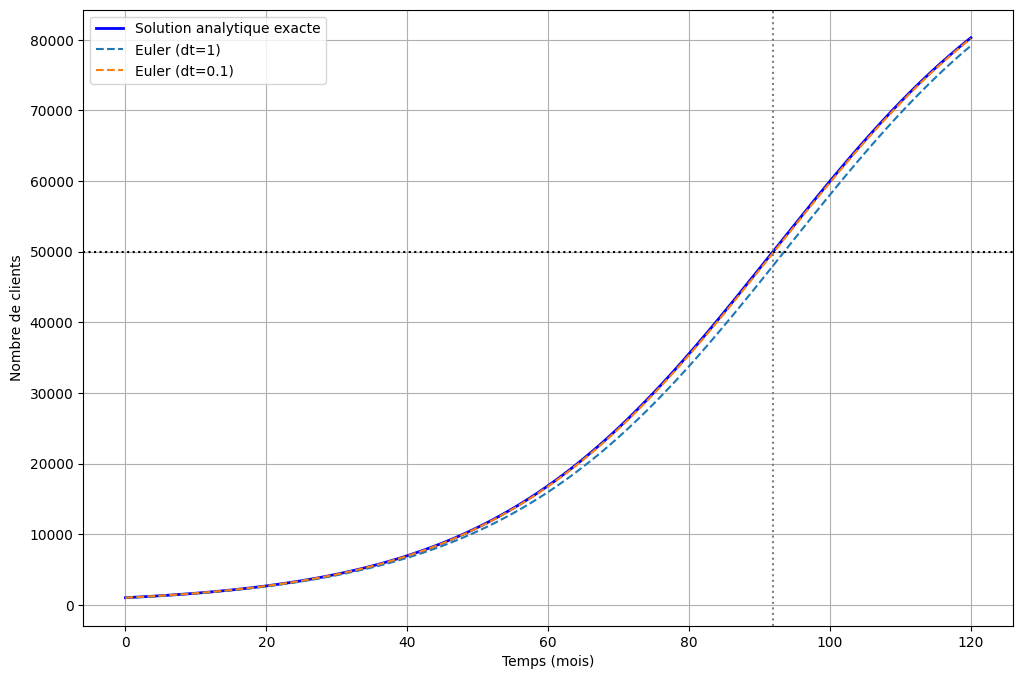

In [9]:
# Tracer les courbes
plt.figure(figsize=(12, 8))

# Solution exacte
t_values = np.linspace(0, t_max, 1000)
exact_values = [P_exact(t) for t in t_values]
plt.plot(t_values, exact_values, 'b-', linewidth=2, label='Solution analytique exacte')

# Approximations d'Euler (pour dt=0.1 et dt=1)
for delta_t in [1, 0.1]:
    t_euler, P_euler = euler_method(delta_t, t_max)
    plt.plot(t_euler, P_euler, '--', linewidth=1.5, label=f'Euler (dt={delta_t})')

plt.axhline(y=50000, color='k', linestyle=':')
plt.axvline(x=91.9, color='gray', linestyle=':')
plt.xlabel('Temps (mois)')
plt.ylabel('Nombre de clients')
plt.legend()
plt.grid(True)
plt.show()

Les trois courbes suivent la forme en "S" caractéristique de la croissance logistique, mais avec des différences notables:

1. La solution exacte montre la trajectoire précise de la croissance des clients
2. L'approximation avec dt=1 (ligne bleue pointillée) présente un écart visible, sous-estimant systématiquement le nombre de clients
3. L'approximation avec dt=0.1 (ligne orange pointillée) se rapproche considérablement de la solution exacte, avec des écarts presque imperceptibles visuellement

(L'approximation avec dt=0.01 est si proche de la solution exacte qu'elle serait pratiquement indiscernable sur le graphique, donc l'inclure n'aurait pas été très informatif visuellement.)

Les lignes pointillées horizontale et verticale marquent respectivement le seuil de 50 000 clients et le temps de 91,9 mois, moment où la solution exacte atteint ce seuil. Le graphique confirme que l'approximation avec dt=0.1 prédit ce moment avec une grande précision, tandis que l'approximation avec dt=1 nécessiterait quelques mois supplémentaires pour atteindre le même seuil.

Cette visualisation corrobore les données numériques sur l'amélioration de la précision lorsque le pas de temps diminue.